In [64]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [65]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data', shuffle=True)
#nie 33
#oso 48

Found 487 files belonging to 2 classes.


In [66]:
data_iterator = data.as_numpy_iterator()

In [67]:
batch = data_iterator.next()

Wartości przyjmują wartość od 0 do 255 co odpowiada wartościom kolorów w notacji RGB

In [48]:
print(np.min(batch[0]), np.max(batch[0]))

0.0 255.0


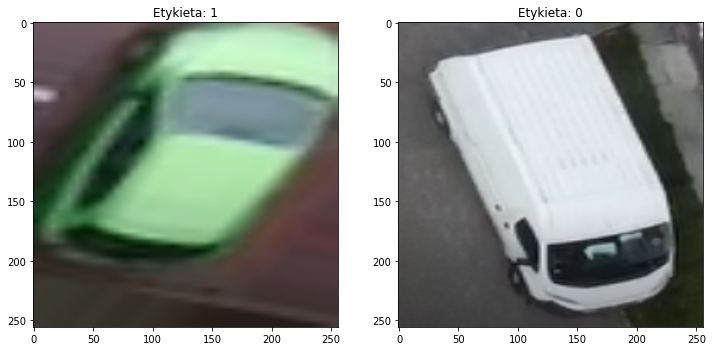

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(12,10))
for i, img_ex in enumerate(batch[0][:2]):
    ax[i].title.set_text(f'Etykieta: {batch[1][i]}')
    ax[i].imshow(img_ex.astype('uint8'))

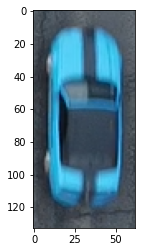

In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

imga_ = cv2.imread('/content/drive/MyDrive/data/osobowe/21.png')
imga_ = cv2.cvtColor(imga_, cv2.COLOR_BGR2RGB)
plt.imshow(imga_)
plt.show()

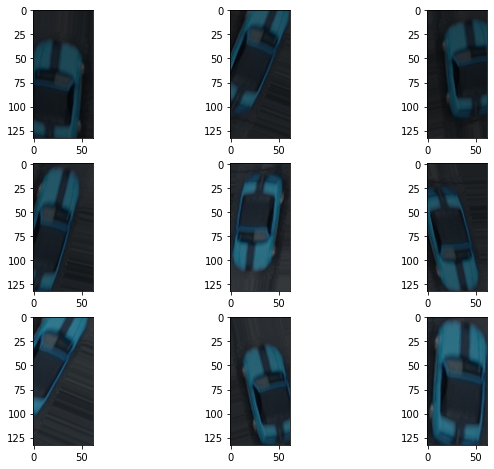

In [8]:
image_ = np.expand_dims(imga_, axis=0)

imgen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.1,
    rotation_range=20,
    shear_range=15.0,
    brightness_range=[0.3,0.6],
    zoom_range=[0.8,1.1],
    horizontal_flip=True,
    vertical_flip=True,
    #fill_mode = 'reflect'
    )
img_train = imgen.flow(image_, batch_size=1)

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize=(10, 8))

for i in range(nrows):
    for j in range(ncols):
        image_batch = img_train.next()
        ax[i,j].imshow(image_batch[0].astype('uint8'))
        ax[i,j].axis('on')

Funkcja dodająca do zbioru przekształconych wersji oryginalnych obrazów

In [9]:
def extend_original_dataset(start, end, klasa, how_much, save_format):

  imgAug = ImageDataGenerator(
          width_shift_range=0.2,
          height_shift_range=0.2,
          rotation_range=20,
          shear_range=15.0,
          brightness_range=[0.3,0.6],
          zoom_range=[0.8,1.2],
          horizontal_flip=True,
          vertical_flip=True)
  
  for i in range(start,end+1):
    IMAGE_PATH = f'/content/drive/MyDrive/data/{str(klasa)}/{str(i)}.png'
    OUTPUT_PATH = f'/content/drive/MyDrive/data/{str(klasa)}'
    if i <= 10:
      nr = IMAGE_PATH[len(IMAGE_PATH) - 5:-4]
    elif 9 < i <= 99:
      nr = IMAGE_PATH[len(IMAGE_PATH) - 6:-4]
    else:
      nr = IMAGE_PATH[len(IMAGE_PATH) - 7:-4]
    
    image = cv2.imread(IMAGE_PATH)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    image = np.expand_dims(image, axis=0)
    imgGen = imgAug.flow(image, save_to_dir=OUTPUT_PATH,
                        save_format=save_format, save_prefix=nr+'_')

    counter = 0
    for (i, newImage) in enumerate(imgGen):
        counter += 1
        if counter == how_much:
            break

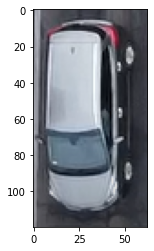

In [130]:
#extend_original_dataset(1, 48, 'osobowe', 1, 'png')

In [10]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data', shuffle=True)

Found 487 files belonging to 2 classes.
